# Behavioral result

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set_theme(style="darkgrid")

Participants: 192 (9)
Adults: 64
Juveniles: 127


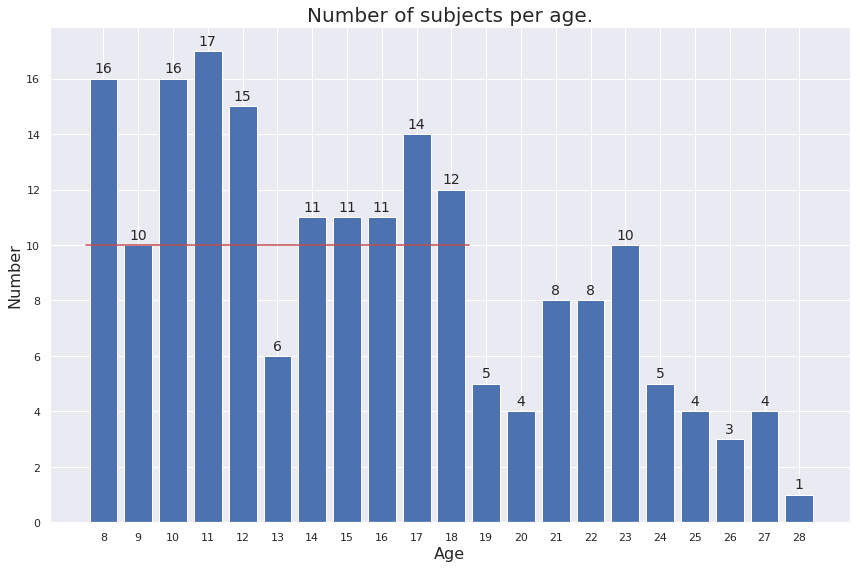

In [5]:
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(participants_file,sep='\t')
data = data[data['game1_fmri']>=0.5]
print("Participants:", len(data),f"({len(data[data['game1_fmri']==0.5])})")
print("Adults:", len(data.query("Age>=18")))
print("Juveniles:", len(data.query("Age<18")))

# extract subject's number in each group
ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
ax.plot([7.5,18.5],[10,10],color='r')
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,29))
ax.set_title("Number of subjects per age",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
savepath = r'/mnt/workdir/DCM/result/behaviour/subjects-game1.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

## Training performance

158


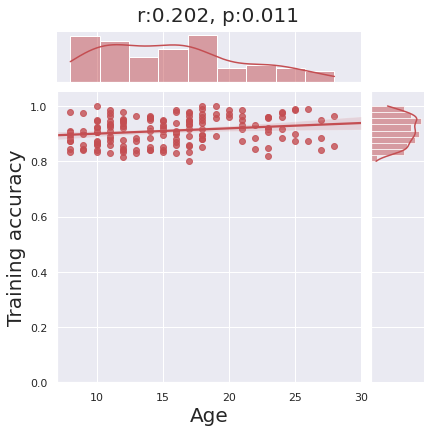

In [32]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
print(len(data))
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
# correlation
res = pearsonr(data['Age'],data['training_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 30), ylim=(0, 1.05),
                  color="r", height=6)
#move overall title up
g.set_axis_labels('Age', 'Training accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)))
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-training.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 1D Inference

158


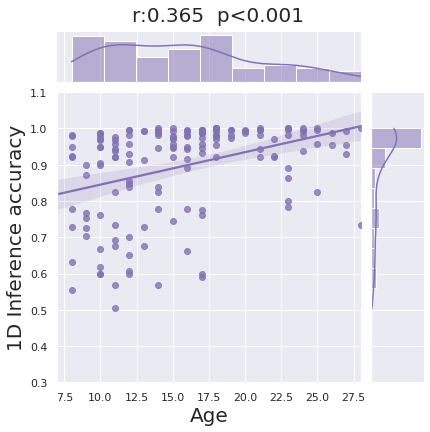

In [35]:
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
print(len(data))
res = pearsonr(data['Age'],data['1D_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="1D_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 28), ylim=(0.3, 1.1),
                  color="m", height=6,order=1)

#move overall title up
g.set_axis_labels('Age', '1D Inference accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-1Dtask.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 2D Inference game1

158


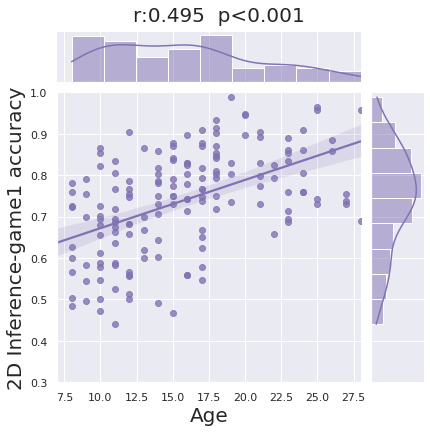

In [36]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]

print(len(data))
res = pearsonr(data['Age'],data['game1_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 28), ylim=(0.3, 1),
                  color="m", height=6,order=1)

#move overall title up
g.set_axis_labels('Age', '2D Inference-game1 accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame1.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

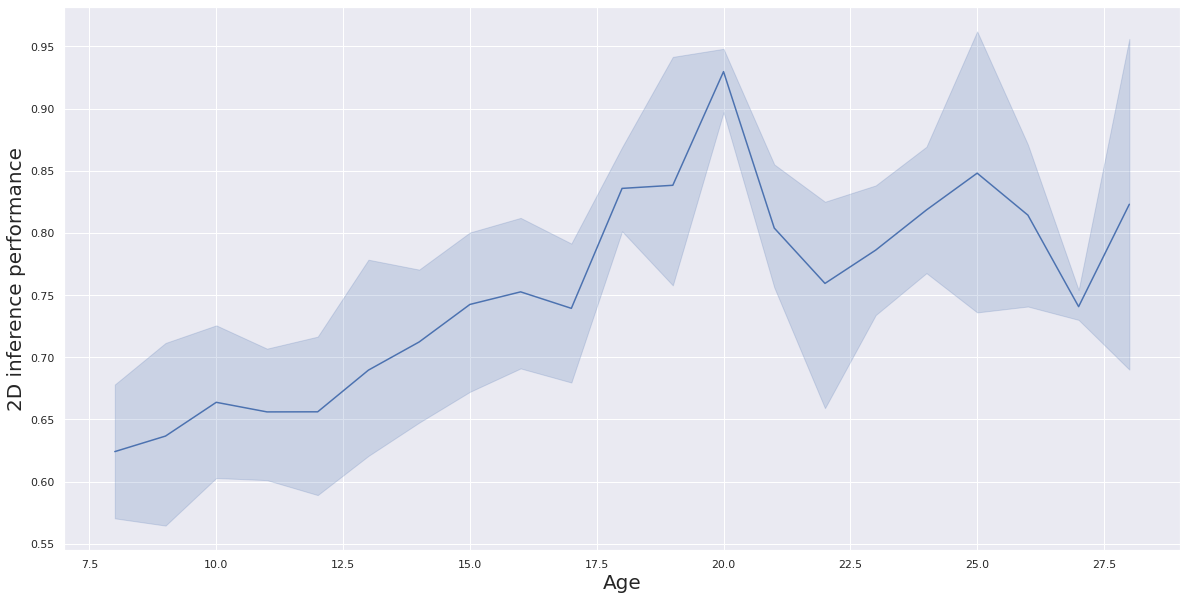

In [10]:
import numpy as np
from scipy.interpolate import make_interp_spline
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')

data = data[data['game1_behavior']>=0.5]
ages = []
accs = []
for sub in data.itertuples():
    ages.append(sub.Age)
    accs.append(sub.game1_acc)

fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.lineplot(x=ages,y=accs)
plt.xlabel("Age",size=20)
plt.ylabel("2D inference performance",size=20)
savepath = r'/mnt/workdir/DCM/result/behaviour/age-2dacc-curve.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

### Partial correlation: Age - 2D Inference game1 by controling training performance

In [18]:
import pingouin as pg

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar=['training_acc'])

,n,r,CI95%,p-val
pearson,162,0.465477,"[0.33, 0.58]",4.920998e-10


# Game2

#### Subject information

Participants: 182 (8)
Adults: 63
Juveniles: 118


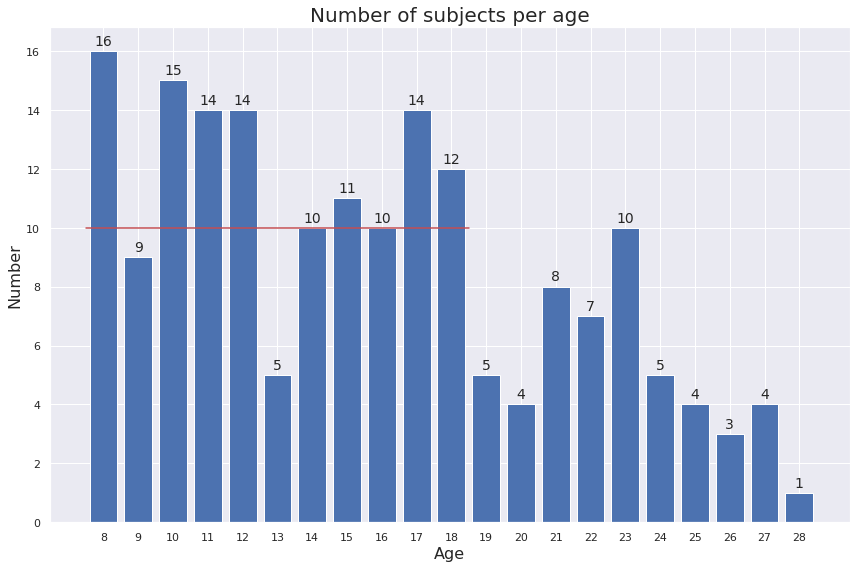

In [6]:
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(participants_file,sep='\t')
data = data[data['game2_fmri']>=0.5]
print("Participants:", len(data),f"({len(data[data['game2_fmri']==0.5])})")
print("Adults:", len(data.query("Age>=18")))
print("Juveniles:", len(data.query("Age<18")))

# extract subject's number in each group
ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
ax.plot([7.5,18.5],[10,10],color='r')
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,29))
ax.set_title("Number of subjects per age",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
savepath = r'/mnt/workdir/DCM/result/behaviour/subjects-game2.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

### Age - game2

154


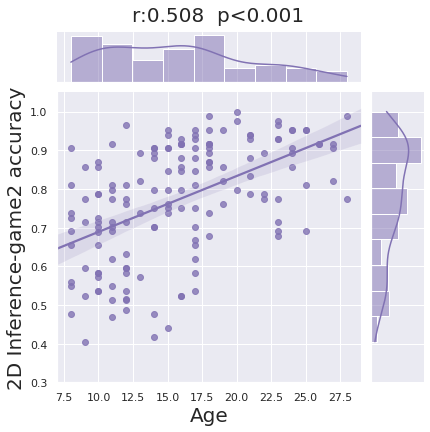

In [44]:
#age-game2
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('(game1_fmri>=0.5)and(game2_behavior>0)')

print(len(data))
# cal correlation
res = pearsonr(data['Age'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 29), ylim=(0.3, 1.05),
                  color="m", height=6,order=1)
#move overall title up
g.set_axis_labels('Age', '2D Inference-game2 accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

154


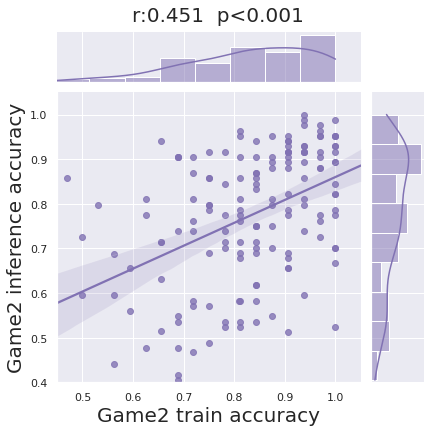

In [46]:
#age-game2
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('(game1_fmri>=0.5)and(game2_behavior>0)')
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
print(len(data))
# cal correlation
res = pearsonr(data['game2_training_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="game2_training_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.45, 1.05), ylim=(0.4, 1.05),
                  color="m", height=6)
#move overall title up
g.set_axis_labels('Game2 train accuracy', 'Game2 inference accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/game2trian-game2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [85]:
import pingouin as pg

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_fmri']==1]
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar=['game2_training_acc'])

,n,r,CI95%,p-val
pearson,137,0.337704,"[0.18, 0.48]",0.000058


###  Age -  correlation between game1 and game2

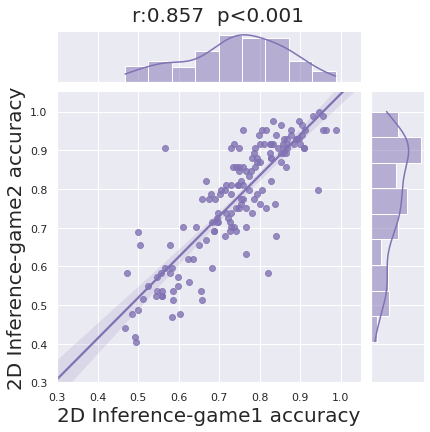

In [47]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('(game1_fmri>=0.5)and(game2_behavior>0)')

# plot
g = sns.jointplot(x="game1_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.3, 1.05), ylim=(0.3, 1.05),
                  color="m", height=6)

res = pearsonr(data['game1_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]

#move overall title up
g.set_axis_labels('2D Inference-game1 accuracy', '2D Inference-game2 accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/game1-game2.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [26]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

print(len(data))
X = data[['Age','training_acc','1D_acc']]
Y = data['game1_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

162
                            OLS Regression Results                            
Dep. Variable:              game1_acc   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.96e-45
Time:                        12:21:47   Log-Likelihood:                 218.95
No. Observations:                 162   AIC:                            -429.9
Df Residuals:                     158   BIC:                            -417.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3787      0.093     -4.07

## game2 GLM

In [31]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_fmri']==1]
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
print(len(data))
X = data[['Age','game2_training_acc']]
Y = data['game2_test_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

136
                            OLS Regression Results                            
Dep. Variable:         game2_test_acc   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     21.40
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           8.75e-09
Time:                        12:27:32   Log-Likelihood:                 85.627
No. Observations:                 136   AIC:                            -165.3
Df Residuals:                     133   BIC:                            -156.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4265   

In [14]:
pearsonr(data['game1_acc'],data['game2_training_acc'])

(0.36560927367313073, 1.116867757007853e-05)

In [14]:
import pandas as pd
import statsmodels.api as sm


beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_behavior']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

print(len(data))
X = data[['Age','game1_acc']]
Y = data['game2_training_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

156
                            OLS Regression Results                            
Dep. Variable:     game2_training_acc   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     34.96
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.13e-13
Time:                        15:25:41   Log-Likelihood:                 132.18
No. Observations:                 156   AIC:                            -258.4
Df Residuals:                     153   BIC:                            -249.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5123      0.051     10.050     

In [27]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_behavior']>0]
adult_data = data.query("Age>=18")

mean = adult_data['game1_acc'].mean()
std = adult_data['game1_acc'].std()

0.08990498411562714

In [30]:
mean-2.3*std

0.6066649651054863